In [63]:
conda install tensorflow

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [64]:
from __future__ import print_function

In [65]:
from tensorflow.keras.datasets import cifar10

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [67]:
from tensorflow.keras.models import Sequential

In [68]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [69]:
from tensorflow.keras.layers import BatchNormalization

In [70]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [71]:
from tensorflow.keras.regularizers import l2

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

In [73]:
batch_size = 32
num_classes = 10
epochs = 50

In [74]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [75]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [76]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [77]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

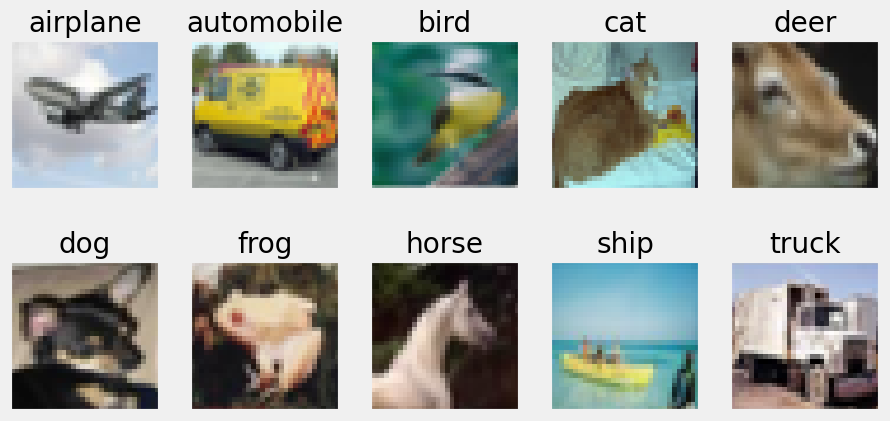

In [78]:
fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [79]:
import tensorflow as tf

In [80]:
y_train.shape

(50000, 1)

In [81]:
y_train[0][0]

6

In [82]:
x_train.shape

(50000, 32, 32, 3)

In [83]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [84]:
x_train[0].shape

(32, 32, 3)

In [85]:
class_names[y_train[1][0]]

'truck'

In [86]:
numpic, x, y, c = x_train.shape
print(f'Number of images = {numpic}, width = {x}, height = {y}, channels = {c}')

Number of images = 50000, width = 32, height = 32, channels = 3


In [87]:
x_test.shape

(10000, 32, 32, 3)

In [88]:
x_train = x_train / 255.0

In [89]:
x_test =  x_test / 255.0

In [90]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [91]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [92]:
from tensorflow.keras.utils import to_categorical

In [93]:
y_cat_train = to_categorical(y_train,10)

In [94]:
y_cat_test = to_categorical(y_test,10)

In [95]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
valid_size = 10000

In [97]:
x_val = x_train[:valid_size]
y_val_cat = y_cat_train[:valid_size]
x_val.shape

(10000, 32, 32, 3)

In [98]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [99]:
x_train = x_train[valid_size:]
y_cat_train= y_cat_train[valid_size:]

In [100]:
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [101]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten   

In [102]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(2,2),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(2,2),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [45]:
history = model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_val,y_val_cat))

Epoch 1/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6580 - accuracy: 0.3895 - val_loss: 1.4377 - val_accuracy: 0.4937
Epoch 2/25
 822/1250 [==================>...........] - ETA: 2s - loss: 1.4018 - accuracy: 0.4918

KeyboardInterrupt: 

In [105]:
history = model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

Epoch 1/25
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5263 - accuracy: 0.4494 - val_loss: 1.2188 - val_accuracy: 0.5786
Epoch 2/25
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1705 - accuracy: 0.5832 - val_loss: 1.0662 - val_accuracy: 0.6187
Epoch 3/25
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0196 - accuracy: 0.6374 - val_loss: 0.9777 - val_accuracy: 0.6567
Epoch 4/25
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9188 - accuracy: 0.6798 - val_loss: 0.9050 - val_accuracy: 0.6850
Epoch 5/25
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8380 - accuracy: 0.7032 - val_loss: 0.8535 - val_accuracy: 0.7022
Epoch 6/25
1250/1250 [==============================] - 12s 10ms/step - loss: 0.7696 - accuracy: 0.7290 - val_loss: 0.8630 - val_accuracy: 0.6966
Epoch 7/25
1250/1250 [==============================] - 12s 10ms/step - loss: 0.7088 - accuracy: 0.7506 - val_loss: 0.8355 -

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)         

In [107]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [108]:
metrics = pd.DataFrame(model.history.history)

In [109]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.526291,0.449450,1.218751,0.5786
1,1.170466,0.583200,1.066243,0.6187
2,1.019574,0.637425,0.977693,0.6567
3,0.918816,0.679825,0.904959,0.6850
4,0.837952,0.703175,0.853515,0.7022
5,0.769584,0.728950,0.863049,0.6966
6,0.708790,0.750575,0.835467,0.7093
7,0.650877,0.766925,0.839186,0.7073
8,0.601304,0.786300,0.832442,0.7180
9,0.553191,0.802075,0.853987,0.7130


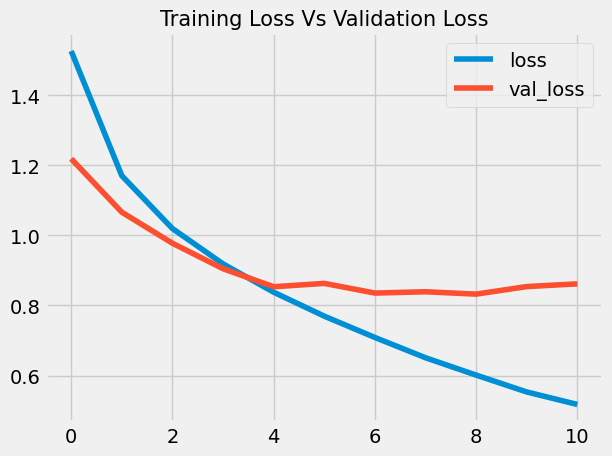

In [110]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=15)
plt.show()

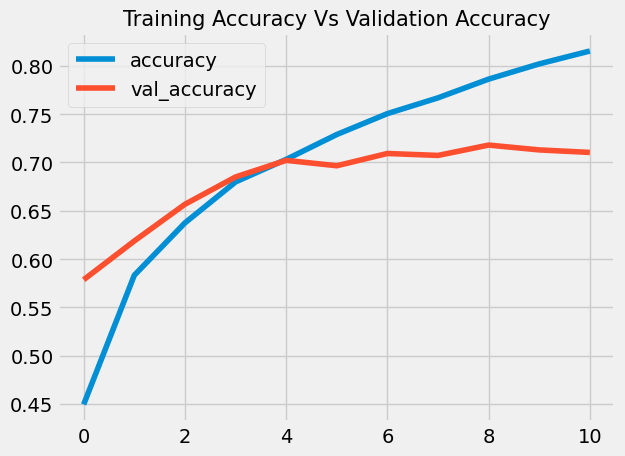

In [111]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=15)
plt.show()

In [112]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8806 - accuracy: 0.7111


[0.8805683851242065, 0.7110999822616577]

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
#predictions = model.predict_classes(x_test)
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.81      0.81      0.81      1000
           2       0.65      0.60      0.62      1000
           3       0.50      0.61      0.55      1000
           4       0.67      0.66      0.67      1000
           5       0.65      0.52      0.58      1000
           6       0.81      0.75      0.78      1000
           7       0.75      0.79      0.77      1000
           8       0.81      0.82      0.81      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

